<a href="https://colab.research.google.com/github/LIONHOOD/DataStructure_Graph/blob/main/Modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 네트워크 modularity 최적화
*과제 : 주어진 네트워크(노드 30개)에서, 노드 10개로 구성되는 모듈 3개(네트워크의 분할)에 대한 modularity 가 가장 높은 모듈 조합 결정*

## Modularity

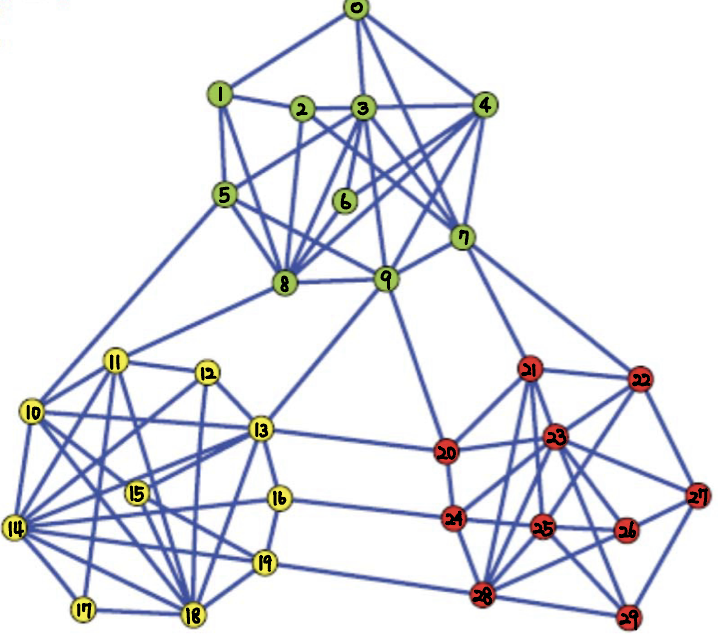

In [ ]:
a0 = [1,3,4,7]
a1 = [0,2,5,8]
a2 = [1,3,7,8]
a3 = [0,2,4,5,6,7,8,9]
a4 = [0,3,6,7,8,9]
a5 = [1,3,8,9,10]
a6 = [3,4,8]
a7 = [0,2,3,4,9,21,22]
a8 = [1,2,3,4,5,6,9,11]
a9 = [3,4,5,7,8,13,20]

a10 = [5,11,13,15,18,14]
a11 = [8,10,12,14,17,18]
a12 = [11,13,14,18]
a13 = [12,10,14,15,18,16,9,20]
a14 = [10,11,12,13,16,19,18,17]
a15 = [10,13,19,18]
a16 = [13,14,19,24]
a17 = [14,11,18]
a18 = [17,14,10,15,11,12,13,19]
a19 = [15,16,14,18,28]

a20 = [9,13,21,23,24]
a21 = [7,20,28,25,23,22]
a22 = [7,21,23,25,27]
a23 = [21,22,20,24,28,26,27,29]
a24 = [20,23,25,16,28]
a25 = [21,24,28,22,26,29]
a26 = [23,27,25,28]
a27 = [22,23,26,29]
a28 = [19,24,21,23,25,26,29]
a29 = [28,25,23,27]

adj = [a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,
       a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,
       a20,a21,a22,a23,a24,a25,a26,a27,a28,a29]

# 노드 개수
print(len(adj))
# 노드별 degree 의 총합 ( = 네트워크 링크 개수 * 2 )
import numpy as np
print(np.sum([len(adj[i]) for i in range(30)]))

30
166


In [ ]:
import numpy as np
# 인접행렬 생성
A = np.zeros((30,30))
for i,a in enumerate(adj):
    A[i,a] = 1
# 대칭행렬 확인
print((A==A.T).all())

True


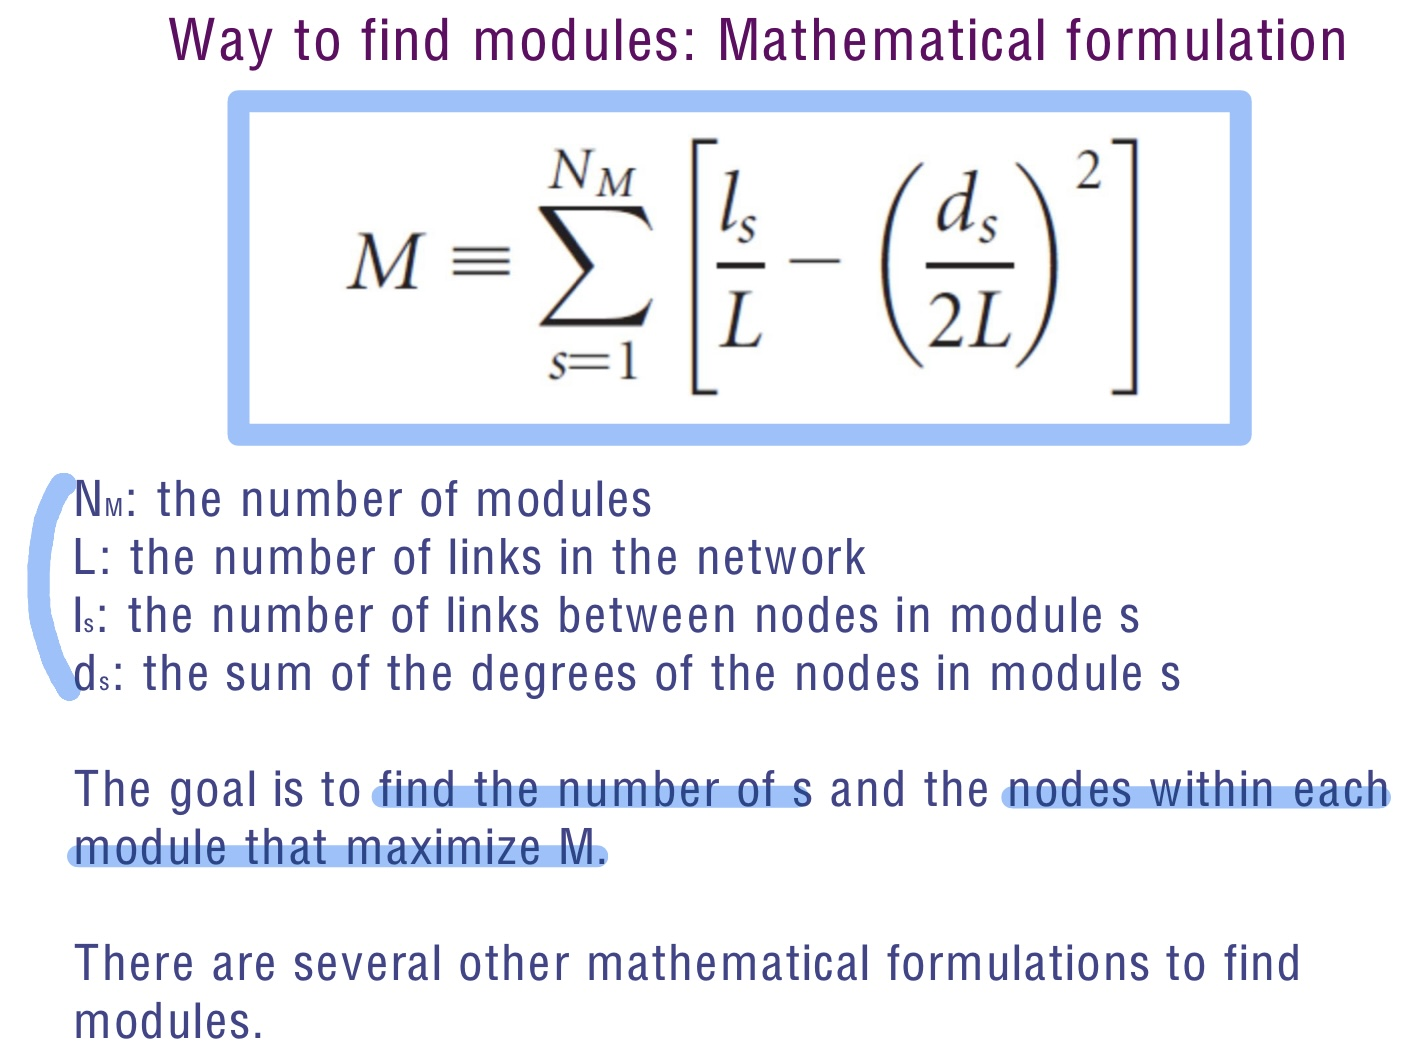

>$modularity\,M\in[-1,1]$ : 네트워크의 모듈화 정도 ; 모듈 내 링크와 모듈 간 링크의 밀도를 비교하여 계산한 값

In [ ]:
# optimization 을 고려하여 module 후보에 대한 정보를 입력받아 modularity 를 계산하는 함수
import numpy as np

def Mvalue(adj_matrix, modules):
    L = np.sum(adj_matrix) / 2 # 네트워크의 총 링크 개수
    M = 0.0 # modularity

    for module in modules:
        subgraph = adj_matrix[np.ix_(module, module)] # 인덱스 그리드로 부분행렬(모듈) 추출
        ls = np.sum(subgraph) / 2  # 모듈 내 총 링크 수
        ds = np.sum(adj_matrix[module]) # 모듈 내 노드의 degree 총합
        print(ls,ds)
        tmp = (ls/L) - (ds/(2*L))**2
        # print(tmp)
        M += tmp # modularity formula

    return M

Mvalue(adj_matrix=A, modules=[range(i,i+10) for i in range(0,30,10)])

25.0 56.0
25.0 56.0
24.0 54.0


0.5581361590942082

## NetworkX 라이브러리를 통한 modularity 계산 검증

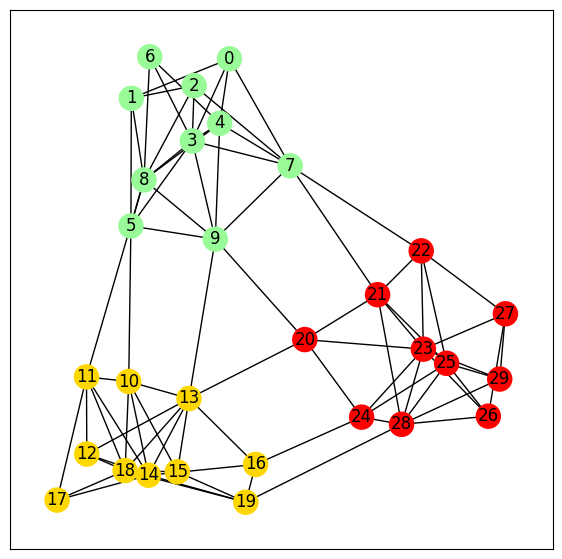

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Graph 객체
G = nx.Graph()
# 노드 입력
G.add_nodes_from(list(range(len(adj))))
# 링크 입력
links = []
for n in range(len(adj)):
    for a in adj[n]:
        links += [(n,a)]
G.add_edges_from(links)

# 네트워크 시각화
plt.figure(figsize=(7,7))
nx.draw_networkx(G, node_color=['palegreen']*10+['gold']*10+['red']*10)

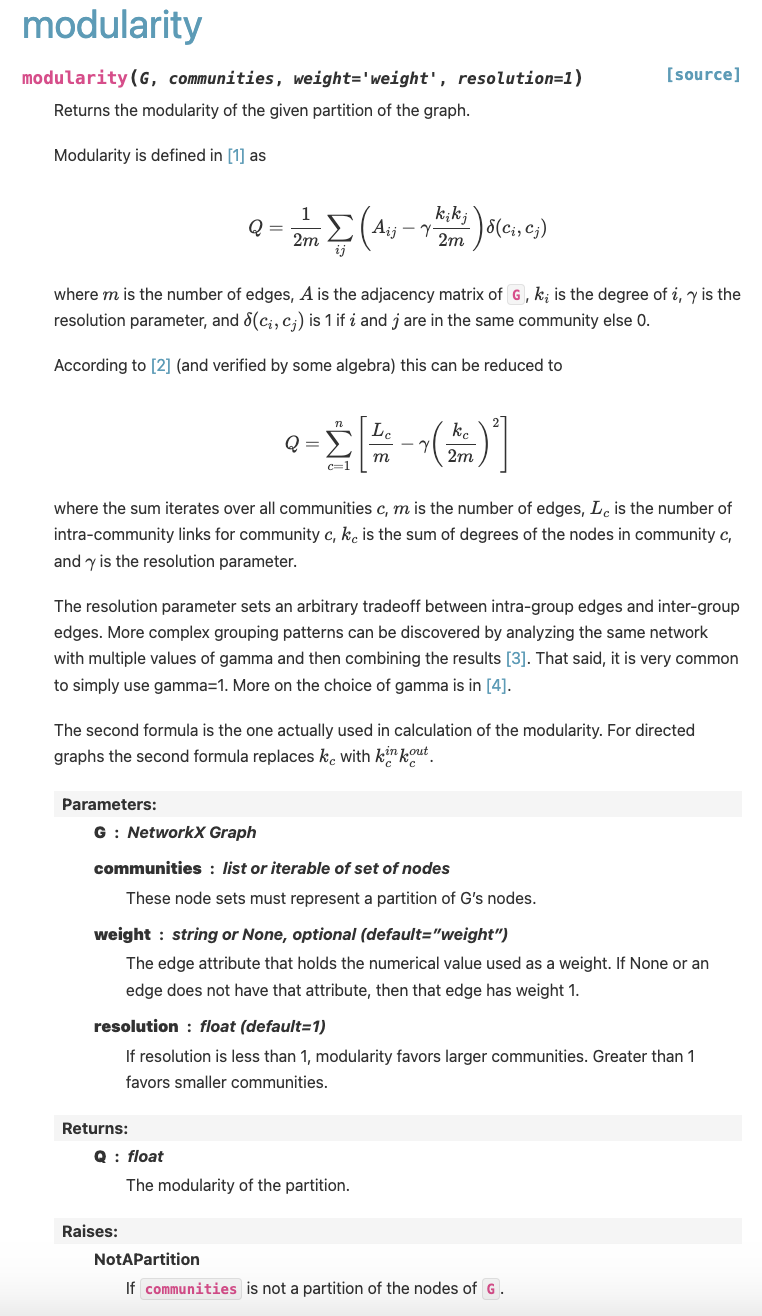

>`G` : Graph 객체  
`communities` : 각 module 에 대한 구성 노드 정보

In [ ]:
# 위에서 직접 구현한 modularity 와 동일한지 검증
nx.community.modularity(G=G, communities=[range(i,i+10) for i in range(0,30,10)])

0.5581361590942082

## Modularity optimization
가장 높은 modularity 를 갖는 커뮤니티(모듈) 조합을 채택(community detection)  
→ 목적 함수가 modularity 인 최적화 문제의 해를 찾기 위한 다양한 알고리즘 활용

### 모듈 3개(각 모듈 내 노드 10개) 조건 하에 modularity 최적화 구현

>가능한 분할의 경우의 수 $=\cfrac{_{30}C_{10}\times_{20}C_{10}\times_{10}C_{10}}{3!}$

In [ ]:
from math import factorial as f
C1 = f(30)/(f(10)*f(30-10))
C2 = f(20)/(f(10)*f(20-10))
C3 = f(10)/(f(10)*f(10-10))
print(C1*C2*C3/f(3)) # 약 9000억 개의 조합 존재 ; 알고리즘의 필요성

925166131890.0


In [ ]:
# modularity 함수 정의
def Mvalue(adj_matrix, modules):
    L = np.sum(adj_matrix) / 2 # 네트워크의 총 링크 개수
    M = 0.0 # modularity
    for module in modules:
        subgraph = adj_matrix[np.ix_(module, module)] # 인덱스 그리드로 부분행렬(모듈) 추출
        ls = np.sum(subgraph) / 2  # 모듈 내 총 링크 수
        ds = np.sum(adj_matrix[module]) # 모듈 내 노드의 degree 총합
        M += ((ls/L) - (ds/(2*L))**2) # modularity formula
    return M

>랜덤으로 주어지는 분할의 현재 iteration 으로부터 modularity 를 계산하고 이전 iteration 까지의 최대 modularity 보다 크면 모듈 조합을 갱신
- iteration 과정에서 이전에 주어졌던 분할이 주어질 수 있으므로 자원 소모가 큼
- 최적 값으로 유도하는 알고리즘 없이 랜덤으로 주어지므로 많은 시간이 소요되고, 최대 modularity 로 수렴하지 못할 가능성이 큼

In [ ]:
from tqdm import tqdm
# 랜덤 최적화 (적용된 알고리즘 없음)
M = -1
m1,m2,m3 = None,None,None
for i in tqdm(range(2*(10**4))):
    nodes = set(np.random.permutation(range(30)))
    c1 = np.random.choice(list(nodes), size=10, replace=False)
    nodes -= set(c1)
    c2 = np.random.choice(list(nodes), size=10, replace=False)
    c3 = np.array(list(nodes-set(c2)))

    M_new = Mvalue(adj_matrix=A, modules=[c1,c2,c3])
    if M<M_new:
        print()
        M,m1,m2,m3 = M_new,c1,c2,c3
        print(M)

print()
print('최적 모듈 조합 :', m1, m2, m3)
print('modularity :', M)

  2%|▏         | 408/20000 [00:00<00:04, 4077.58it/s]


-0.1286834083321237

-0.047176658440992905

-0.03360429670489187

-0.02170126288285673

0.0038467121498040324

0.013717520685150225

0.015894904920888367

0.040063869937581695

0.11177239076789083

0.19407751487879227


 74%|███████▎  | 14717/20000 [00:02<00:00, 5359.31it/s]


0.19531136594571052


 99%|█████████▊| 19728/20000 [00:03<00:00, 5657.17it/s]


0.20873856873276242


100%|██████████| 20000/20000 [00:03<00:00, 5321.22it/s]


최적 모듈 조합 : [24 23  3 22 28  2 26  0 20  1] [27  8  9 21  4  7 29  5 25 17] [ 6 10 11 12 13 14 15 16 18 19]
modularity : 0.20873856873276242


>랜덤 최적화의 결과로부터 각 모듈의 부분집합을 결정하고 결정되지 않은 부분만 다시 랜덤 최적화를 수행
- 모듈의 부분집합을 결정하기 위한 첫 번째 랜덤 최적화의 modularity 에 대한 threshold 를 적절하게 지정해야 함
- 첫 번째 랜덤 최적화 결과가 타당하지 않은 경우 결정된 부분집합이 틀리기 때문에 필연적으로 두 번째 랜덤 최적화는 최적 값으로 수렴 불가능
- 단순 랜덤 최적화에 비해, 최적화 소요 시간 및 modularity 수렴 성능 측면에서 개선됨

In [ ]:
from tqdm import tqdm
# 부분 최적화 : 랜덤 최적화 + 모듈 후보 추정 by threshold of modularity
M = -1
m1,m2,m3 = None,None,None
pseudo_modules = []
threshold = 0.3

for i in tqdm(range(2*(10**7))):
    nodes = set(np.random.permutation(range(30)))
    c1 = np.random.choice(list(nodes), size=10, replace=False)
    nodes -= set(c1)
    c2 = np.random.choice(list(nodes), size=10, replace=False)
    c3 = np.array(list(nodes-set(c2)))

    M_new = Mvalue(adj_matrix=A, modules=[c1,c2,c3])
    if threshold<M_new:
        print()
        M,m1,m2,m3 = M_new,set(c1),set(c2),set(c3)
        pseudo_modules.append([m1,m2,m3])
        print(M)

    if len(pseudo_modules)==2:
        print(f'Two modularities high enough to guess which nodes are in same module')
        break

# 모듈 조합 일부 고정 (경우의 수 축소)
p1 = pseudo_modules[0]
p2 = pseudo_modules[1]
parts = np.array([p1[i]&p2[j] for i in range(len(p1)) for j in range(len(p2))])
parts_len = np.array([len(p) for p in parts])
p1, p2 = parts[np.argsort(parts_len)][-2:]
print(p1, p2)

for i in tqdm(range(10**6)):
    nodes = set(range(30)) - p1 - p2
    c1_rest = np.random.choice(list(nodes), size=10-len(p1), replace=False)
    nodes -= set(c1_rest)
    c2_rest = np.random.choice(list(nodes), size=10-len(p2), replace=False)
    c3 = np.array(list(nodes-set(c2_rest)))
    c1 = np.array(list(p1|set(c1_rest)))
    c2 = np.array(list(p2|set(c2_rest)))

    M_new = Mvalue(adj_matrix=A, modules=[c1,c2,c3])
    if M<M_new:
        print()
        M,m1,m2,m3 = M_new,c1,c2,c3
        print(M)

print()
print('최적 모듈 조합 :', m1, m2, m3)
print('modularity :', M)

  2%|▏         | 478391/20000000 [01:53<1:05:09, 4993.31it/s]


0.3165916678763246


 12%|█▏        | 2365469/20000000 [08:29<1:03:20, 4639.48it/s]



0.304035418783568
Two modularities high enough to guess which nodes are in same module
{21, 22, 23, 24, 27, 29} {10, 11, 12, 13, 16, 17, 18, 19}


  0%|          | 499/1000000 [00:00<03:20, 4986.49it/s]


0.37676005225722164

0.42538830018870666


  0%|          | 2843/1000000 [00:00<02:53, 5756.89it/s]


0.4491943678327769

0.46182319640005803


  0%|          | 4677/1000000 [00:00<02:47, 5949.75it/s]


0.4858470024677022


  8%|▊         | 78350/1000000 [00:14<02:59, 5141.42it/s]


0.5581361590942082


100%|██████████| 1000000/1000000 [03:07<00:00, 5324.38it/s]


최적 모듈 조합 : [20 21 22 23 24 25 26 27 28 29] [10 11 12 13 14 15 16 17 18 19] [0 1 2 3 4 5 6 7 8 9]
modularity : 0.5581361590942082


→ 확률적이지만 사전에 주어진 모듈 정보와 동일하게 `modularity=0.5581361590942082`로 수렴하는 것에 성공

### NetworkX 라이브러리를 통한 최대 modularity 및 최적 모듈 조합 검증

>다양한 고급 알고리즘이 구현된 함수를 사용하여 주어진 네트워크의 최대 modularity 및 최적 모듈 조합을 확인

In [ ]:
com = nx.community.greedy_modularity_communities(G)
print(*com)
print(nx.community.modularity(G, communities=com))

frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9}) frozenset({10, 11, 12, 13, 14, 15, 16, 17, 18, 19}) frozenset({20, 21, 22, 23, 24, 25, 26, 27, 28, 29})
0.5581361590942082


In [ ]:
com = nx.community.label_propagation_communities(G)
print(*com)
print(nx.community.modularity(G, communities=com))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {10, 11, 12, 13, 14, 15, 16, 17, 18, 19} {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
0.5581361590942082


In [ ]:
com = nx.community.louvain_communities(G)
print(*com)
print(nx.community.modularity(G, communities=com))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {10, 11, 12, 13, 14, 15, 16, 17, 18, 19} {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
0.5581361590942082


In [ ]:
com = list(nx.community.louvain_partitions(G))[0]
print(*com)
print(nx.community.modularity(G, communities=com))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {10, 11, 12, 13, 14, 15, 16, 17, 18, 19} {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
0.5581361590942082


In [ ]:
GirvanNewman = list(nx.community.girvan_newman(G))
modularities = {nx.community.modularity(G, communities=com) : com for com in GirvanNewman}
print(*modularities[max(modularities)])
print(max(modularities))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {10, 11, 12, 13, 14, 15, 16, 17, 18, 19} {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
0.5581361590942082


>모든 최적화 알고리즘에서 동일한 결과 반환
- 모듈 3개 조건을 무시하여도 주어진 네트워크의 최대 modularity 는 0.5581361590942082
- 최적 모듈 조합은 {0,…,9}, {10,…,19}, {20,…,29} 로 결정되는 것을 확인

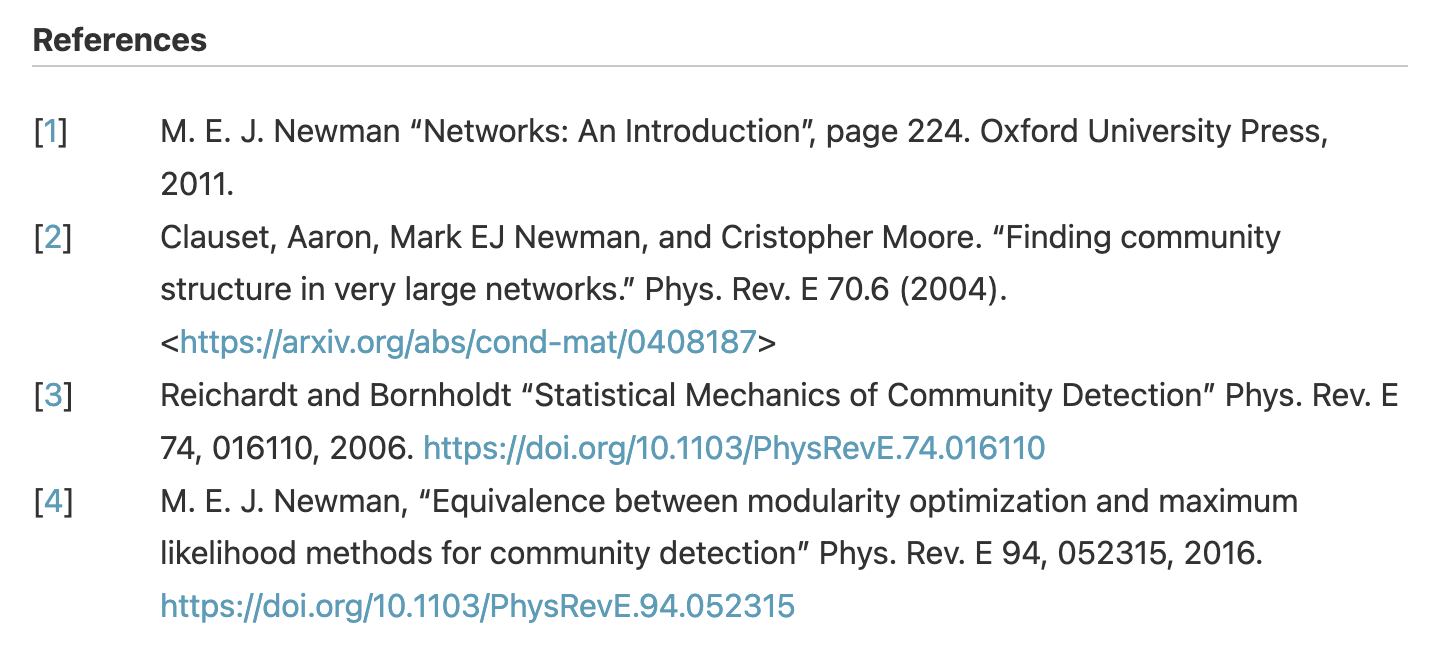